In [1]:
from orcabridge.orchestrator import *

PodA
PodA
PodA


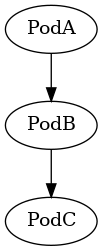

In [2]:
# Defining an example pipeline where
# A -> B -> C

pod_a = Pod(name="PodA")
pod_b = Pod(name="PodB")
pod_c = Pod(name="PodC")

# Constructing pipeline via add_parent method( Bottom up approach)
pod_b.add_parent(pod_a)
pod_c.add_parent(pod_b)

# Draw graph can be called form any node in the pipeline
pod_a.draw_graph()

In [2]:
# Could also chain it like this

# Defining an example pipeline where
# A -> B -> C

pod_a = Pod(name="PodA")
pod_b = Pod(name="PodB")
pod_c = Pod(name="PodC")

# Constructing pipeline via add_parent method( Bottom up approach)
pod_c.add_parent(pod_b).add_parent(pod_a)

# Draw graph can be called form any node in the pipeline
pod_a.draw_graph()

NameError: name 'Pod' is not defined

PodD
PodD
PodD


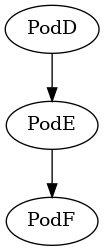

In [3]:
# Construction pipeline from add_child method (Top down approach)
pod_d = Pod(name="PodD")
pod_e = Pod(name="PodE")
pod_f = Pod(name="PodF")

pod_d.add_child(pod_e)
pod_e.add_child(pod_f)

pod_e.draw_graph()

PodD
PodD
PodD


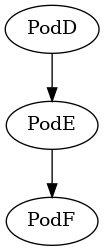

In [4]:
# For add children, you can also chain it like this
# Construction pipeline from add_child method (Top down approach)
pod_d = Pod(name="PodD")
pod_e = Pod(name="PodE")
pod_f = Pod(name="PodF")

pod_d.add_child(pod_e).add_child(pod_f)

pod_e.draw_graph()

PodG
PodG
PodG


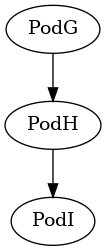

In [5]:
# Also you can mix and match both approaches
pod_g = Pod(name="PodG")
pod_h = Pod(name="PodH")
pod_i = Pod(name="PodI")

pod_h.add_parent(pod_g)
pod_h.add_child(pod_i)

pod_g.draw_graph()

PodA
PodA
PodA
PodA


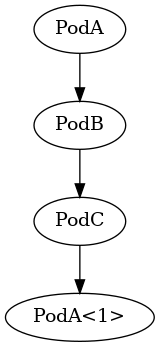

In [6]:
# Example of duplicate nodes (Example would in the case where a common pre processing step is reused)
pod_a = Pod(name="PodA")
pod_b = Pod(name="PodB")
pod_c = Pod(name="PodC")

pod_b.add_parent(pod_a)
pod_c.add_parent(pod_b)


# Add another pod A after pod_c
pod_c.add_child(pod_a)

pod_c.draw_graph()

Filter By Subject Type
Filter By Subject Type
Filter By Subject Type
Filter By Subject Type
Filter By Subject Type
Filter By Subject Type
Filter By Subject Type
Filter By Subject Type
Filter By Subject Type


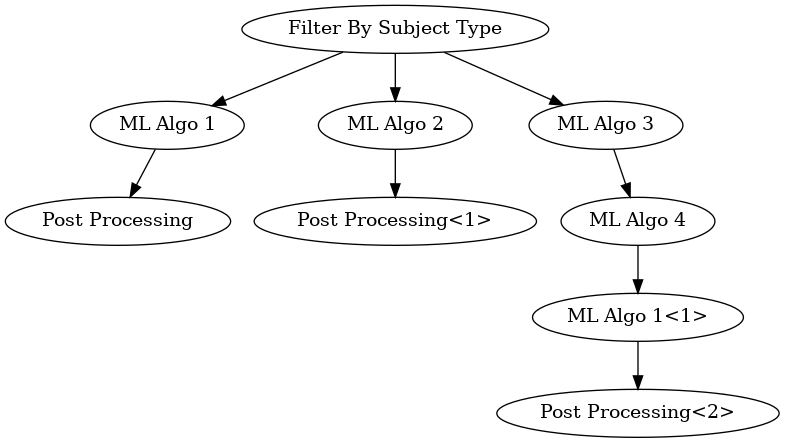

In [7]:
# More complicated example
# Example of duplicate nodes (Example would in the case where a common pre processing step is reused)
filter_pod = Pod(name="Filter By Subject Type")
ml1 = Pod(name="ML Algo 1")
ml2 = Pod(name="ML Algo 2")
ml3 = Pod(name="ML Algo 3")
ml4 = Pod(name="ML Algo 4")
pp = Pod(name="Post Processing")

# Algo 1
filter_pod.add_child(ml1)
ml1.add_child(pp)

# Algo 2
filter_pod.add_child(ml2)
ml2.add_child(pp)

# Algo 3
filter_pod.add_child(ml3).add_child(ml4).add_child(ml1).add_child(pp)

filter_pod.draw_graph()

In [8]:
# BIG NOTE, in RUST the idea is to combine this behavior of creating pipelines into the Pod struct, with an additional fields of parent, child, and node name.
# Node name is extra field that is meant to deal with the case where there is multiple of the same pod in the same pipeline